In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

# Dataset

In [2]:
import os
x = [[],[],[]]
names = ["Confident","Nervous","Neutral"]
arr = os.listdir("C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram")
print(arr)
for i in range(len(names)):
    temparr = os.listdir("C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\" +arr[i]+"\\"+ names[i])
    print(temparr)
    for j in range(len(temparr)):
        x[i].append(temparr[j])

['mel_12', 'mel_120', 'window_stft']
['01_01_Confident.png', '01_02_Confident.png', '01_03_Confident.png', '01_04_Confident.png', '01_05_Confident.png', '01_06_Confident.png', '01_07_Confident.png', '01_08_Confident.png', '01_09_Confident.png', '01_10_Confident.png', '01_11_Confident.png', '01_12_Confident.png', '01_13_Confident.png', '01_14_Confident.png', '01_15_Confident.png', '01_16_Confident.png', '01_17_Confident.png', '01_18_Confident.png', '01_19_Confident.png', '01_20_Confident.png', '01_21_Confident.png', '01_22_Confident.png', '01_23_Confident.png', '01_24_confident.png', '01_25_Confident.png', '01_26_Confident.png', '02_01_Confident.png', '02_02_Confident.png', '02_03_Confident.png', '02_04_Confident.png', '02_05_Confident.png', '02_06_Confident.png', '02_07_Confident.png', '02_08_Confident.png', '02_09_Confident.png', '02_10_Confident.png', '02_11_Confident.png', '02_12_Confident.png', '02_13_Confident.png', '02_14_Confident.png', '02_15_Confident.png', '02_16_Confident.pn

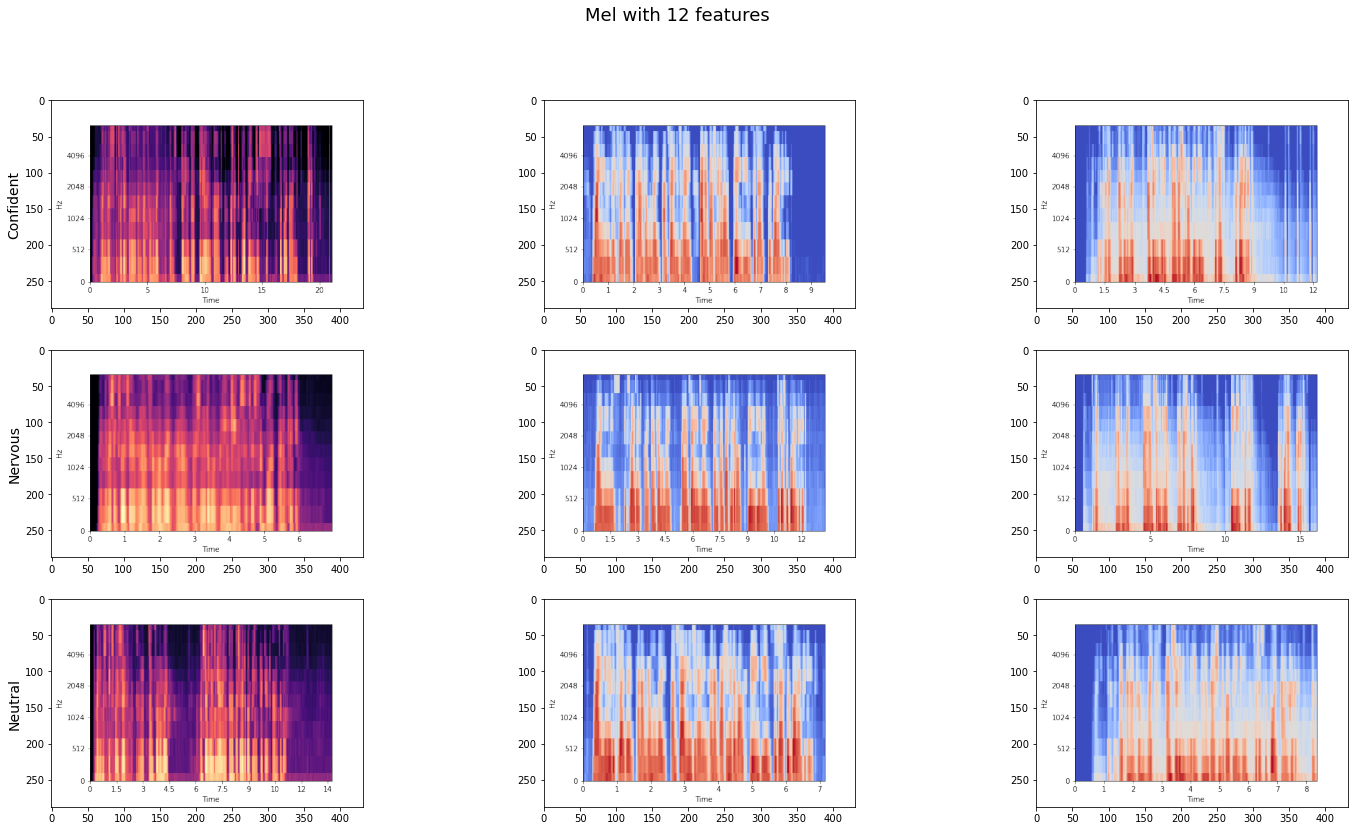

In [5]:
#load the confident dataset for all Confident questions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25, 13))
plt.suptitle('Mel with 12 features',size=(18))
z = 1
for i in range(3):
    for j in range(3):
        filename = "C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\" + arr[0] + "\\"+names[i]+"\\{}".format((x[i][j]))
        plt.subplot(3,3,z)
        img = mpimg.imread(filename)
        if z ==1 or z==4 or z==7:
            plt.ylabel(names[i],size="14")
        plt.imshow(img)
        z+=1
    

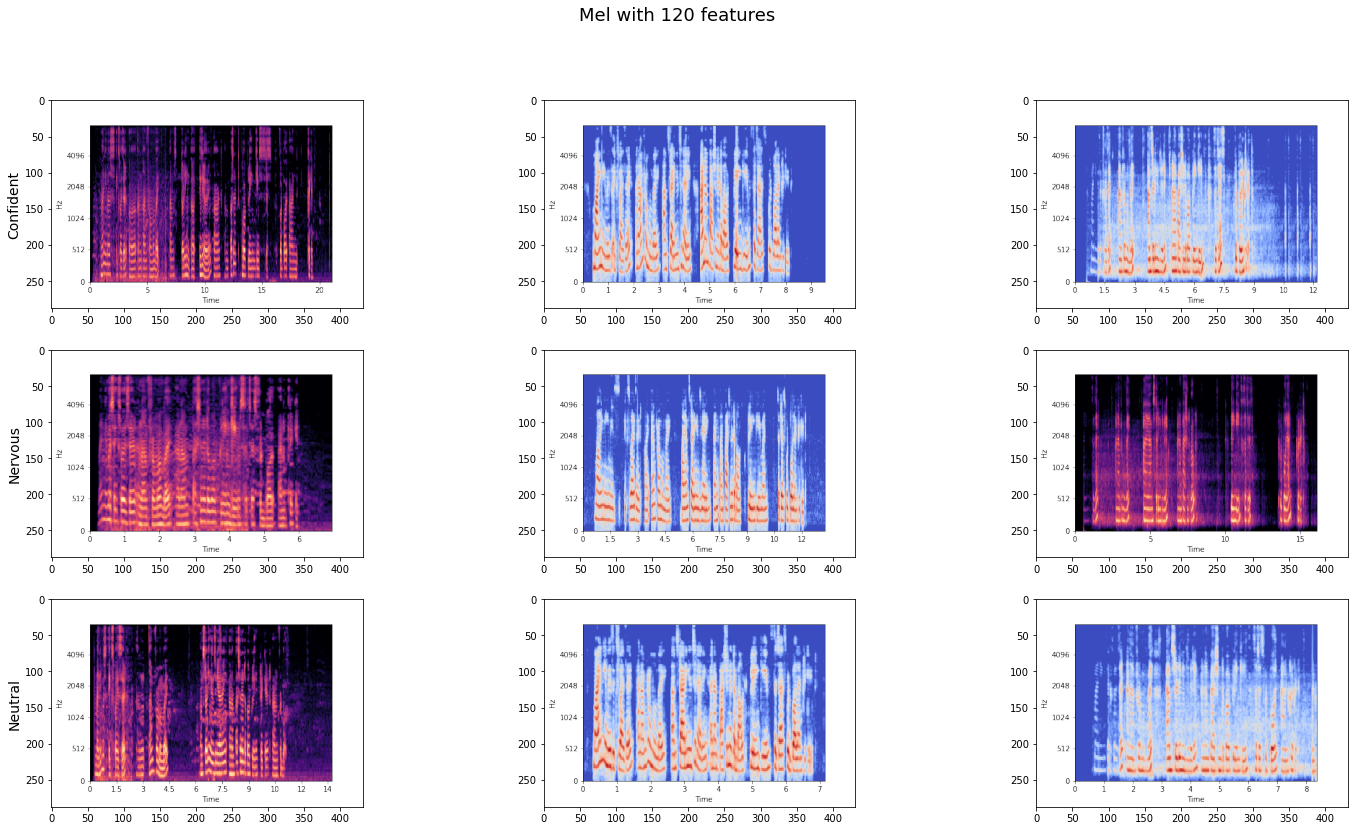

In [4]:
#load the confident dataset for all Confident questions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25, 13))
plt.suptitle('Mel with 120 features',size=(18))
z = 1
for i in range(3):
    for j in range(3):
        filename = "C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\" + arr[1] + "\\"+names[i]+"\\{}".format((x[i][j]))
        plt.subplot(3,3,z)
        img = mpimg.imread(filename)
        if z ==1 or z==4 or z==7:
            plt.ylabel(names[i],size="14")
        plt.imshow(img)
        z+=1

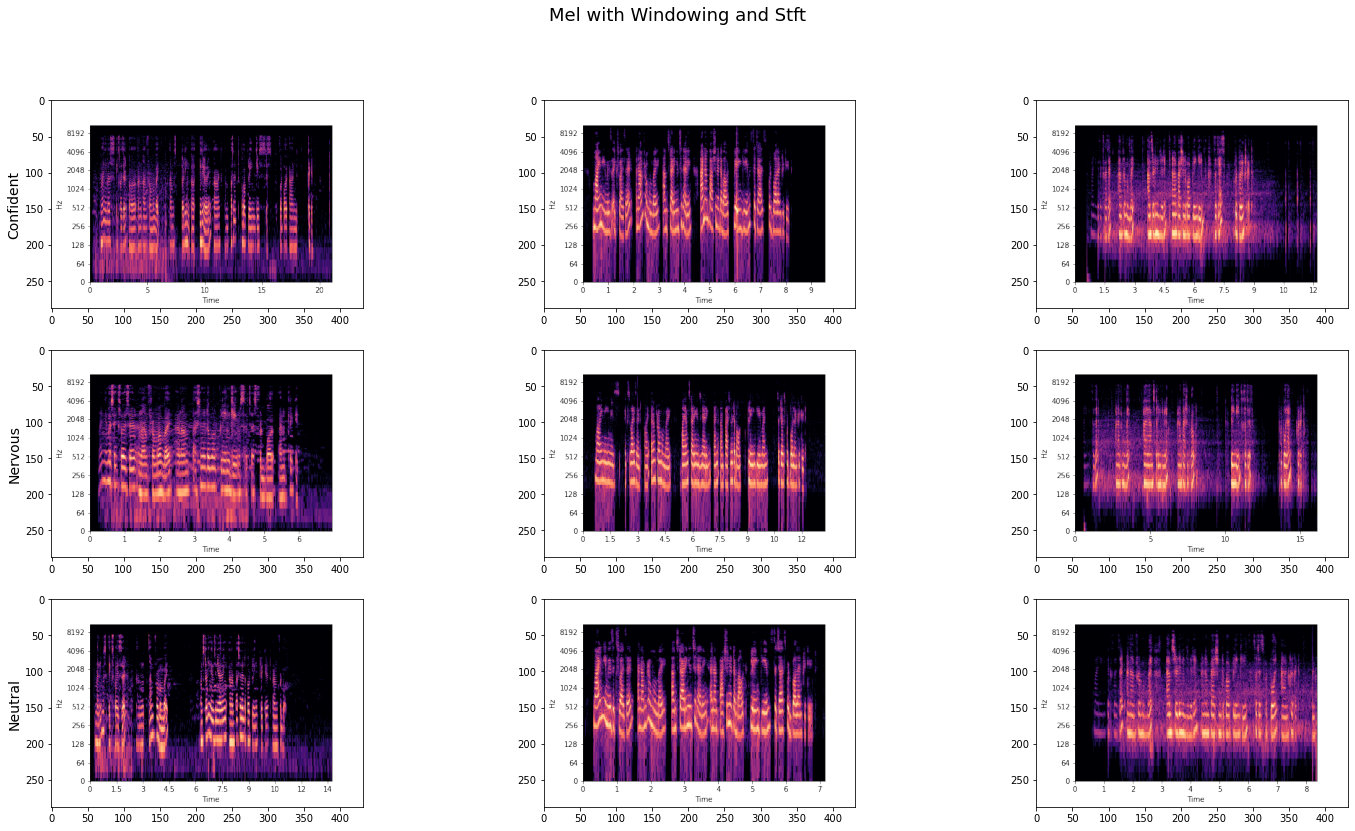

In [6]:
#load the confident dataset for all Confident questions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25, 13))
plt.suptitle('Mel with Windowing and Stft',size=(18))
z = 1
for i in range(3):
    for j in range(3):
        filename = "C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\" + arr[2] + "\\"+names[i]+"\\{}".format((x[i][j]))
        plt.subplot(3,3,z)
        img = mpimg.imread(filename)
        if z ==1 or z==4 or z==7:
            plt.ylabel(names[i],size="14")
        plt.imshow(img)
        z+=1
    

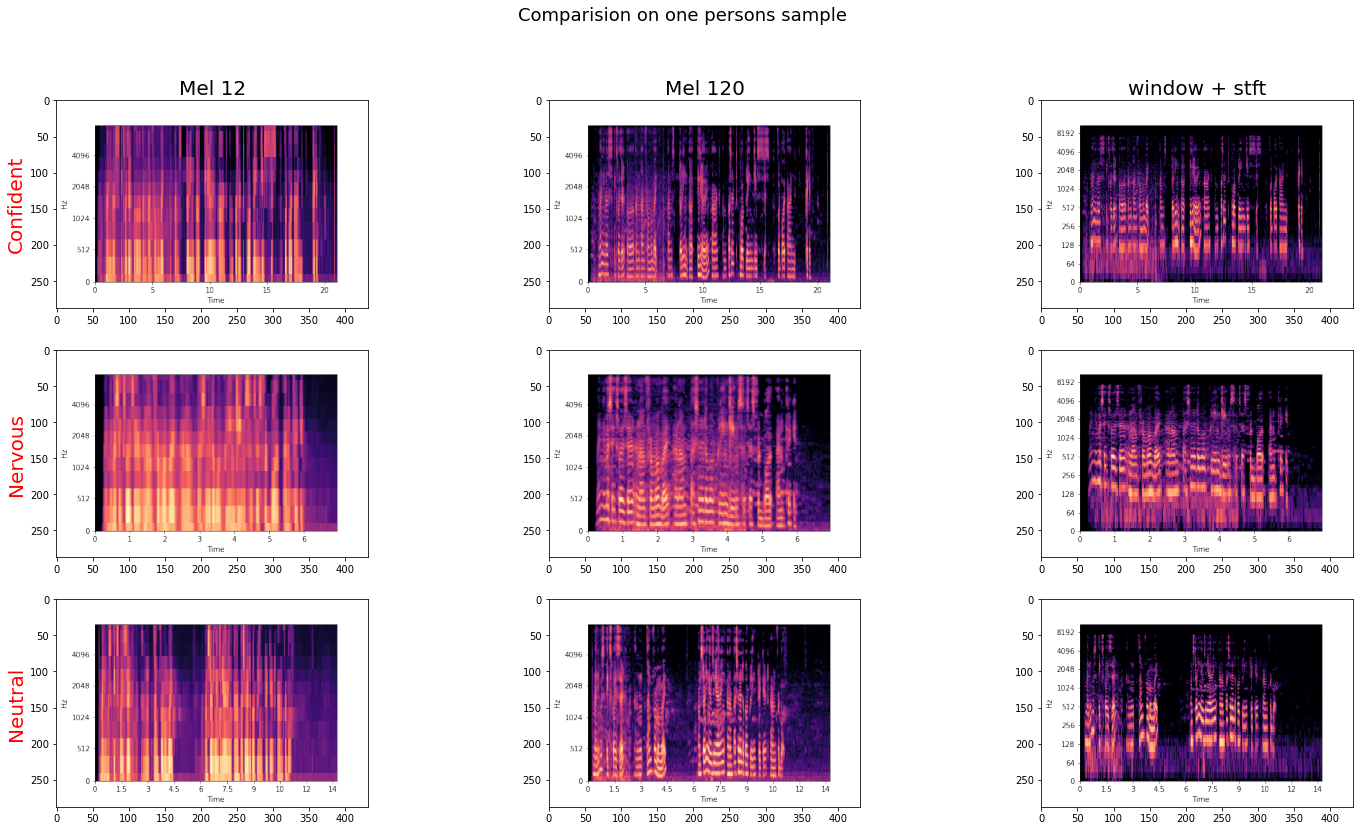

In [7]:
#load the confident dataset for all Confident questions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25, 13))
plt.suptitle('Comparision on one persons sample',size=(18))
z = 1
for i in range(3):
    for j in range(3):
        filename = "C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\" + arr[j] + "\\"+names[i]+"\\{}".format((x[i][0]))
        plt.subplot(3,3,z)
        img = mpimg.imread(filename)
        if z== 1:
            plt.title("Mel 12",size="20")
        elif z== 2:
            plt.title("Mel 120",size="20")
        elif z== 3:
            plt.title("window + stft",size="20")

        if z ==1 or z==4 or z==7:
            plt.ylabel(names[i],size="20",color="r")
        plt.imshow(img)
        z+=1
    

Mel 12

In [2]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 3

# Make a dataset containing the training spectrograms
train_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\mel_12'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\mel_12'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 390 files belonging to 3 classes.
Using 312 files for training.
Found 390 files belonging to 3 classes.
Using 78 files for validation.


In [3]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 3

# Make a dataset containing the training spectrograms
train_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\mel_120'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\mel_120'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 390 files belonging to 3 classes.
Using 312 files for training.
Found 390 files belonging to 3 classes.
Using 78 files for validation.


In [4]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 3

# Make a dataset containing the training spectrograms
train_dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\window_stft'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join('C:\\Users\\Aditya Kamath\\Downloads\\MP\\New Codes\\Final Dataset\\Spectogram\\window_stft'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 390 files belonging to 3 classes.
Using 312 files for training.
Found 390 files belonging to 3 classes.
Using 78 files for validation.


Preparing the data

In [5]:
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

#Data
train_dataset1 = prepare(train_dataset1, augment=False)
valid_dataset1 = prepare(valid_dataset1, augment=False)

train_dataset2 = prepare(train_dataset2, augment=False)
valid_dataset2 = prepare(valid_dataset2, augment=False)

train_dataset3 = prepare(train_dataset3, augment=False)
valid_dataset3 = prepare(valid_dataset3, augment=False)

# CNN

In [6]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],)
# Train model for 10 epochs, capture the history
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                     

In [7]:
history1 = model.fit(train_dataset1, epochs=10, validation_data=valid_dataset1)
history2 = model.fit(train_dataset2, epochs=10, validation_data=valid_dataset2)
history3 = model.fit(train_dataset3, epochs=10, validation_data=valid_dataset3)

Epoch 1/10
10/10 [==============================] - 9s 608ms/step - loss: 1.5373 - accuracy: 0.4647 - val_loss: 1.9947 - val_accuracy: 0.2821
Epoch 2/10
10/10 [==============================] - 6s 534ms/step - loss: 0.7566 - accuracy: 0.6891 - val_loss: 3.6456 - val_accuracy: 0.2821
Epoch 3/10
10/10 [==============================] - 7s 656ms/step - loss: 0.6531 - accuracy: 0.7596 - val_loss: 3.9798 - val_accuracy: 0.2821
Epoch 4/10
10/10 [==============================] - 6s 613ms/step - loss: 0.4042 - accuracy: 0.8494 - val_loss: 5.3701 - val_accuracy: 0.2821
Epoch 5/10
10/10 [==============================] - 6s 588ms/step - loss: 0.2416 - accuracy: 0.9231 - val_loss: 5.1719 - val_accuracy: 0.2821
Epoch 6/10
10/10 [==============================] - 6s 587ms/step - loss: 0.1550 - accuracy: 0.9647 - val_loss: 7.2495 - val_accuracy: 0.2821
Epoch 7/10
10/10 [==============================] - 6s 574ms/step - loss: 0.1411 - accuracy: 0.9487 - val_loss: 7.7182 - val_accuracy: 0.2821
Epoch 

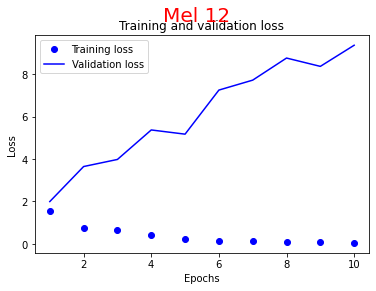

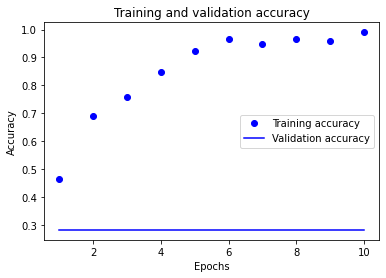

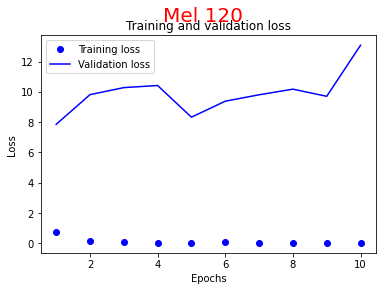

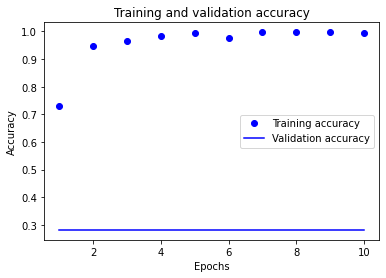

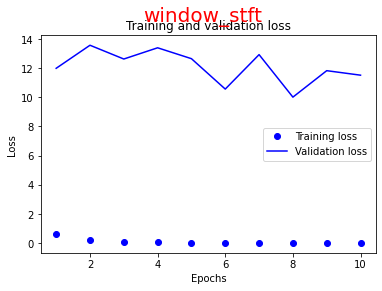

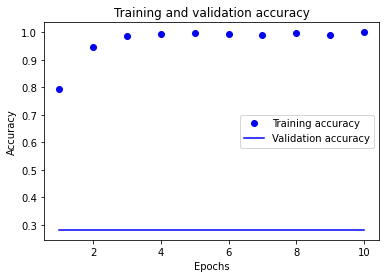

In [23]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
z = 1
for i in range(3):
    history_dict = history[i].history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)


    plt.suptitle(spectogram[i],size=20,color='r')
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    z+=1

    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values)+1)

    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    z+=1



In [28]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
valid_dataset = [valid_dataset1,valid_dataset2,valid_dataset3]

# Compute the final loss and accuracy
for i in range(3):
    final_loss, final_acc = model.evaluate(valid_dataset[i], verbose=0)
    print(spectogram[i])
    print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))
    print("\n")

Mel 12
Final loss: 11.011202, final accuracy: 0.282051


Mel 120
Final loss: 11.095023, final accuracy: 0.282051


window_stft
Final loss: 11.518810, final accuracy: 0.282051




On augmented data

In [40]:
def prepare(ds, augment=True):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

#Data
train_dataset1 = prepare(train_dataset1, augment=True)
valid_dataset1 = prepare(valid_dataset1, augment=True)

train_dataset2 = prepare(train_dataset2, augment=True)
valid_dataset2 = prepare(valid_dataset2, augment=True)

train_dataset3 = prepare(train_dataset3, augment=True)
valid_dataset3 = prepare(valid_dataset3, augment=True)


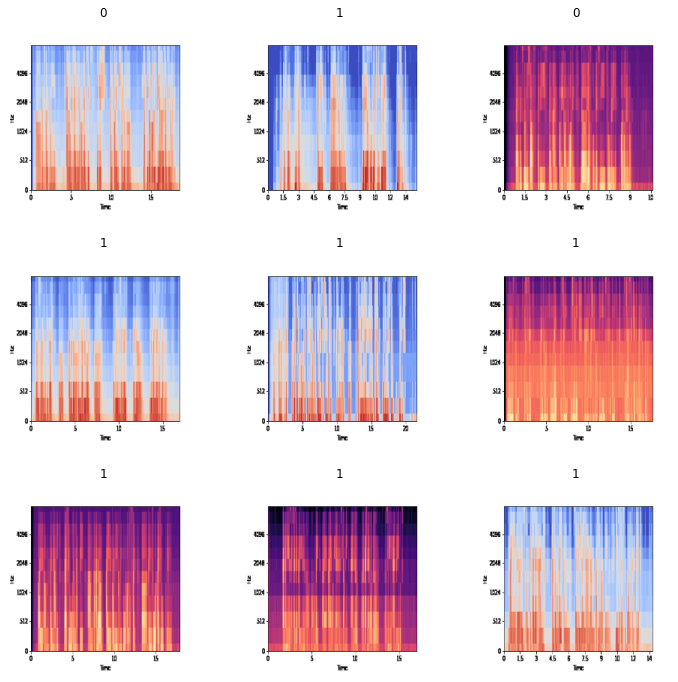

In [41]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset1.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [42]:
history1 = model.fit(train_dataset1, epochs=10, validation_data=valid_dataset1)
history2 = model.fit(train_dataset2, epochs=10, validation_data=valid_dataset2)
history3 = model.fit(train_dataset3, epochs=10, validation_data=valid_dataset3)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 1.1013 - accuracy: 0.3333 - val_loss: 16.1049 - val_accuracy: 0.2821
Epoch 2/10
10/10 [==============================] - 10s 956ms/step - loss: 1.1008 - accuracy: 0.3333 - val_loss: 18.1961 - val_accuracy: 0.2821
Epoch 3/10
10/10 [==============================] - 10s 913ms/step - loss: 1.0989 - accuracy: 0.3654 - val_loss: 14.9524 - val_accuracy: 0.2821
Epoch 4/10
10/10 [==============================] - 9s 886ms/step - loss: 1.1006 - accuracy: 0.3173 - val_loss: 13.4890 - val_accuracy: 0.2821
Epoch 5/10
10/10 [==============================] - 9s 883ms/step - loss: 1.0994 - accuracy: 0.3462 - val_loss: 16.0328 - val_accuracy: 0.2821
Epoch 6/10
10/10 [==============================] - 9s 905ms/step - loss: 1.1005 - accuracy: 0.3429 - val_loss: 19.6487 - val_accuracy: 0.2821
Epoch 7/10
10/10 [==============================] - 10s 924ms/step - loss: 1.0999 - accuracy: 0.3045 - val_loss: 24.3813 - val_accuracy: 0.282

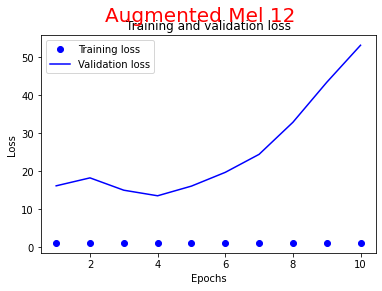

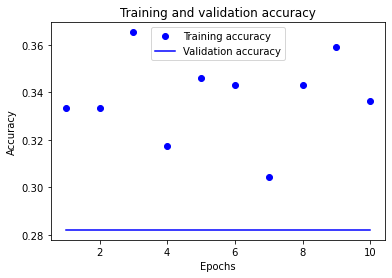

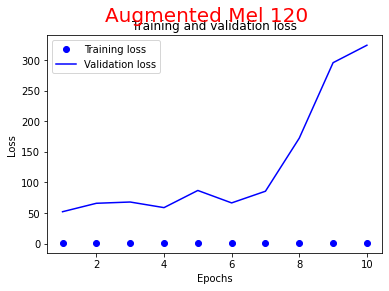

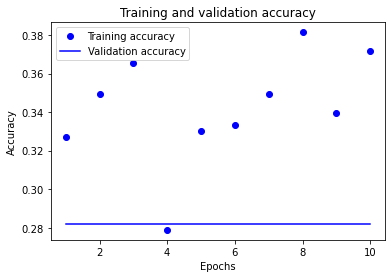

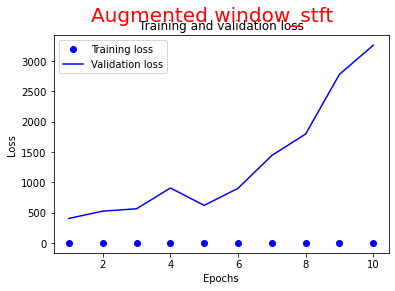

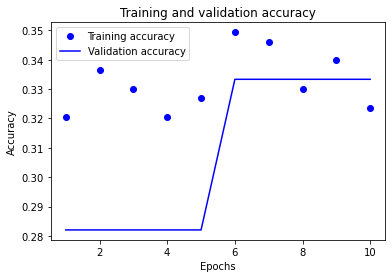

In [45]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
z = 1
for i in range(3):
    history_dict = history[i].history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)


    plt.suptitle("Augmented {} ".format(spectogram[i]),size=20,color='r')
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    z+=1

    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values)+1)

    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    z+=1



In [47]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
valid_dataset = [valid_dataset1,valid_dataset2,valid_dataset3]

# Compute the final loss and accuracy
for i in range(3):
    final_loss, final_acc = model.evaluate(valid_dataset[i], verbose=0)
    print("Augmented ",spectogram[i])
    print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))
    print("\n")

Augmented  Mel 12
Final loss: 3260.708008, final accuracy: 0.333333


Augmented  Mel 120
Final loss: 3260.708008, final accuracy: 0.333333


Augmented  window_stft
Final loss: 3260.708008, final accuracy: 0.333333




# RESNET

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS))

for layer in base_model.layers:
    layer.trainable = True
    
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(128, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(3, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Non Augmented Data

In [53]:
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

#Data
train_dataset1 = prepare(train_dataset1, augment=False)
valid_dataset1 = prepare(valid_dataset1, augment=False)

train_dataset2 = prepare(train_dataset2, augment=False)
valid_dataset2 = prepare(valid_dataset2, augment=False)

train_dataset3 = prepare(train_dataset3, augment=False)
valid_dataset3 = prepare(valid_dataset3, augment=False)


In [54]:
history1 = model.fit(train_dataset1, epochs=10, validation_data=valid_dataset1)
history2 = model.fit(train_dataset2, epochs=10, validation_data=valid_dataset2)
history3 = model.fit(train_dataset3, epochs=10, validation_data=valid_dataset3)

Epoch 1/10
10/10 [==============================] - 98s 8s/step - loss: 1.3463 - accuracy: 0.3077 - val_loss: 2.4661 - val_accuracy: 0.2821
Epoch 2/10
10/10 [==============================] - 85s 8s/step - loss: 1.2908 - accuracy: 0.3301 - val_loss: 1.3622 - val_accuracy: 0.2821
Epoch 3/10
10/10 [==============================] - 81s 8s/step - loss: 1.2233 - accuracy: 0.3429 - val_loss: 1.1014 - val_accuracy: 0.2821
Epoch 4/10
10/10 [==============================] - 83s 8s/step - loss: 1.2415 - accuracy: 0.3109 - val_loss: 1.0973 - val_accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 84s 8s/step - loss: 1.2749 - accuracy: 0.2949 - val_loss: 1.0961 - val_accuracy: 0.3846
Epoch 6/10
10/10 [==============================] - 84s 8s/step - loss: 1.2096 - accuracy: 0.3397 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 7/10
10/10 [==============================] - 85s 8s/step - loss: 1.2302 - accuracy: 0.3205 - val_loss: 1.0966 - val_accuracy: 0.3846
Epoch 8/10
10/10 [==

In [ ]:
history1 = model.fit(train_dataset1, epochs=10, validation_data=valid_dataset1)

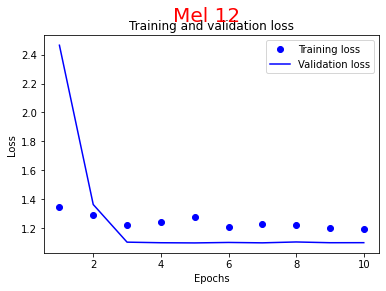

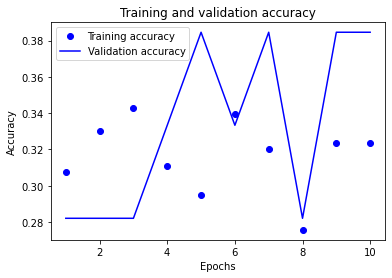

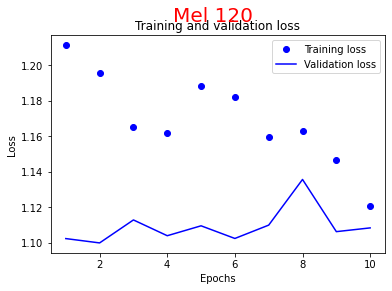

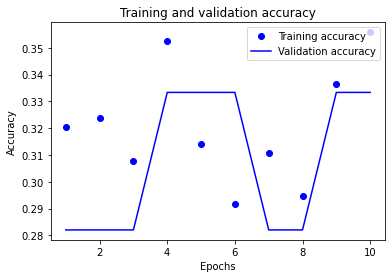

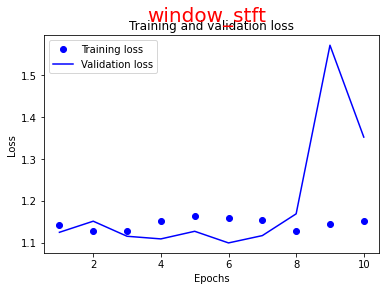

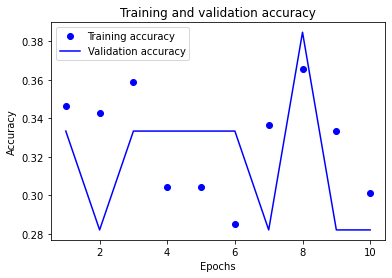

In [55]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
z = 1
for i in range(3):
    history_dict = history[i].history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)


    plt.suptitle(spectogram[i],size=20,color='r')
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    z+=1

    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values)+1)

    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    z+=1



In [56]:
history = [history1,history2,history3]
spectogram = ["Mel 12","Mel 120","window_stft"]
valid_dataset = [valid_dataset1,valid_dataset2,valid_dataset3]

# Compute the final loss and accuracy
for i in range(3):
    final_loss, final_acc = model.evaluate(valid_dataset[i], verbose=0)
    print(spectogram[i])
    print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))
    print("\n")

Mel 12
Final loss: 1.352172, final accuracy: 0.282051


Mel 120
Final loss: 1.352172, final accuracy: 0.282051


window_stft
Final loss: 1.352172, final accuracy: 0.282051


